# РК2 Крайчиков Олег Денисович

### Импорт библиотек

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
data = pd.read_csv('kar.csv')

In [88]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club
0,158023,L. Messi,31,Argentina,94,94,6
1,20801,Cristiano Ronaldo,33,Portugal,94,94,123
2,190871,Neymar Jr,26,Brazil,92,93,20
3,193080,De Gea,27,Spain,91,93,139
4,192985,K. De Bruyne,27,Belgium,91,92,13


In [32]:
parts = np.split(data, [10], axis=1)
data = parts[0]

In [63]:
data.dtypes

ID              Int64
Name           string
Age             Int64
Nationality    string
Overall         Int64
Potential       Int64
Club           string
dtype: object

In [61]:
data = data.convert_dtypes()


In [77]:
data.isnull().sum()

ID             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
dtype: int64

In [64]:
data.dtypes

ID              Int64
Name           string
Age             Int64
Nationality    string
Overall         Int64
Potential       Int64
Club           string
dtype: object

In [95]:
le = LabelEncoder()
le.fit(data.Name) 
data.Name = le.transform(data.Name)

In [96]:
data.head()


,ID,Name,Age,Nationality,Overall,Potential,Club
0,158023,9632,31,9632,94,94,6
1,20801,3153,33,3153,94,94,123
2,190871,12508,26,12508,92,93,20
3,193080,4136,27,4136,91,93,139
4,192985,8617,27,8617,91,92,13


In [75]:
data.isnull().sum()
# проверим есть ли пропущенные значения

ID             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
dtype: int64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           18207 non-null  Int64
 1   Name         18207 non-null  int32
 2   Age          18207 non-null  Int64
 3   Nationality  18207 non-null  int32
 4   Overall      18207 non-null  Int64
 5   Potential    18207 non-null  Int64
 6   Club         18207 non-null  int32
dtypes: Int64(4), int32(3)
memory usage: 853.6 KB


In [98]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club
0,158023,9632,31,9632,94,94,6
1,20801,3153,33,3153,94,94,123
2,190871,12508,26,12508,92,93,20
3,193080,4136,27,4136,91,93,139
4,192985,8617,27,8617,91,92,13


<AxesSubplot:>

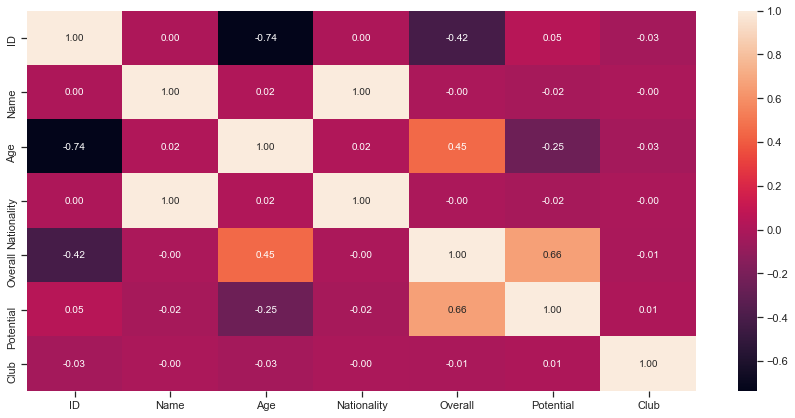

In [99]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [124]:
X = data.drop(['Overall'], axis = 1)
Y = data.Overall
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

        ID   Name  Age  Nationality  Potential  Club
0  158023   9632   31         9632         94     6
1   20801   3153   33         3153         94   123
2  190871  12508   26        12508         93    20
3  193080   4136   27         4136         93   139
4  192985   8617   27         8617         92    13 

Выходные данные:

 0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: Int64


In [125]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

            ID  Name  Age  Nationality  Potential  Club
17929  244056  2990   18         2990         66   115
10668  231353  4441   20         4441         77    59
15882  229914  4556   21         4556         62   126
14698  245522  6093   24         6093         62   130
8509   237252  7745   23         7745         73   157 

Входные параметры тестовой выборки:

            ID   Name  Age  Nationality  Potential  Club
15885  228381   4404   22         4404         65   144
13652  223146   5267   22         5267         69   145
13522  208771   5540   24         5540         65   126
7814   228388  11612   23        11612         76   132
15904  243243  15269   19        15269         72   153 

Выходные параметры обучающей выборки:

 17929    51
10668    65
15882    58
14698    60
8509     67
Name: Overall, dtype: Int64 

Выходные параметры тестовой выборки:

 15885    58
13652    62
13522    62
7814     67
15904    58
Name: Overall, dtype: In

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [127]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

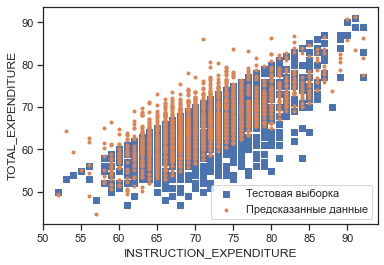

In [128]:
plt.scatter(X_test.Potential, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Potential, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('INSTRUCTION_EXPENDITURE')
plt.ylabel ('TOTAL_EXPENDITURE')
plt.show()

In [136]:
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))

Коэффициент детерминации: 0.8467083078866217
Средняя абсолютная ошибка: 2.0961041462500787
Средняя квадратичная ошибка: 7.275976479869679
Median absolute error: 1.7898126738096636


In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [131]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.4535969247666121
Средняя квадратичная ошибка: 0.6658758923668316
Median absolute error: 0.20000000000000284
Коэффициент детерминации: 0.9859711967787662


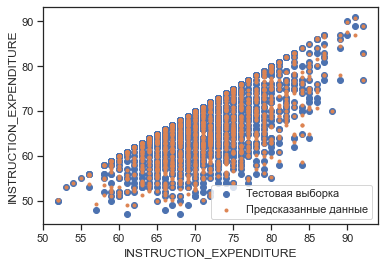

In [133]:
plt.scatter(X_test.Potential, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.Potential, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.ylabel('INSTRUCTION_EXPENDITURE')
plt.show()